# Seja Bem Vindo a Insights da Amostra

Nessa parte vamos tirar algumas conclusões sobre os dados, ou seja, o passado!

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
# Abrir o arquivo CSV
amostra_df = pd.read_csv('Tabelas/amostras_df.csv')
amostra_df.head()

,Data da Coleta,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Valor de Venda,Unidade de Medida,Bandeira
0,2012-01-02,NE,BA,FEIRA DE SANTANA,ETANOL,2.050,Litro,COSAN LUBRIFICANTES
1,2012-01-02,SE,RJ,ITAPERUNA,GASOLINA,2.849,Litro,RAIZEN
2,2012-01-02,S,PR,CAMPO MOURAO,GASOLINA,2.769,Litro,BRANCA
3,2012-01-02,N,PA,TUCURUI,DIESEL,2.310,Litro,IPIRANGA
4,2012-01-02,N,PA,SANTANA DO ARAGUAIA,DIESEL,2.300,Litro,RAIZEN


# Talvez você não goste de ler

Então mostratrei graficos para que eu e você possamos entender de forma visual os dados que acabamos de analisar

## 1. Grafico de barra de vendas por região

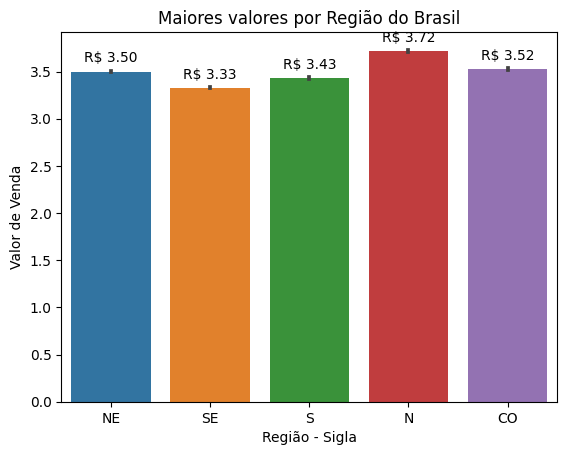

In [5]:
grafico1 = sns.barplot(amostra_df, x='Regiao - Sigla', y='Valor de Venda')

plt.xlabel('Região - Sigla')
plt.ylabel('Valor de Venda')
plt.title('Maiores valores por Região do Brasil')

for p in grafico1.patches:
    valor = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, valor + 0.1, f'R$ {valor:.2f}', ha='center')

if not os.path.exists("Graficos_salvos"):
    os.makedirs("Graficos_salvos")

plt.savefig("Graficos_salvos/Maiores-valores-por-Regiao-do-Brasil.png")

plt.show()

Aqui podemos ver que o nordeste é a região com os maiores valores nos preços dos combustiveis desde 2012 até 2022

## 2. Produtos com maiores preços em cada Região do Brasil

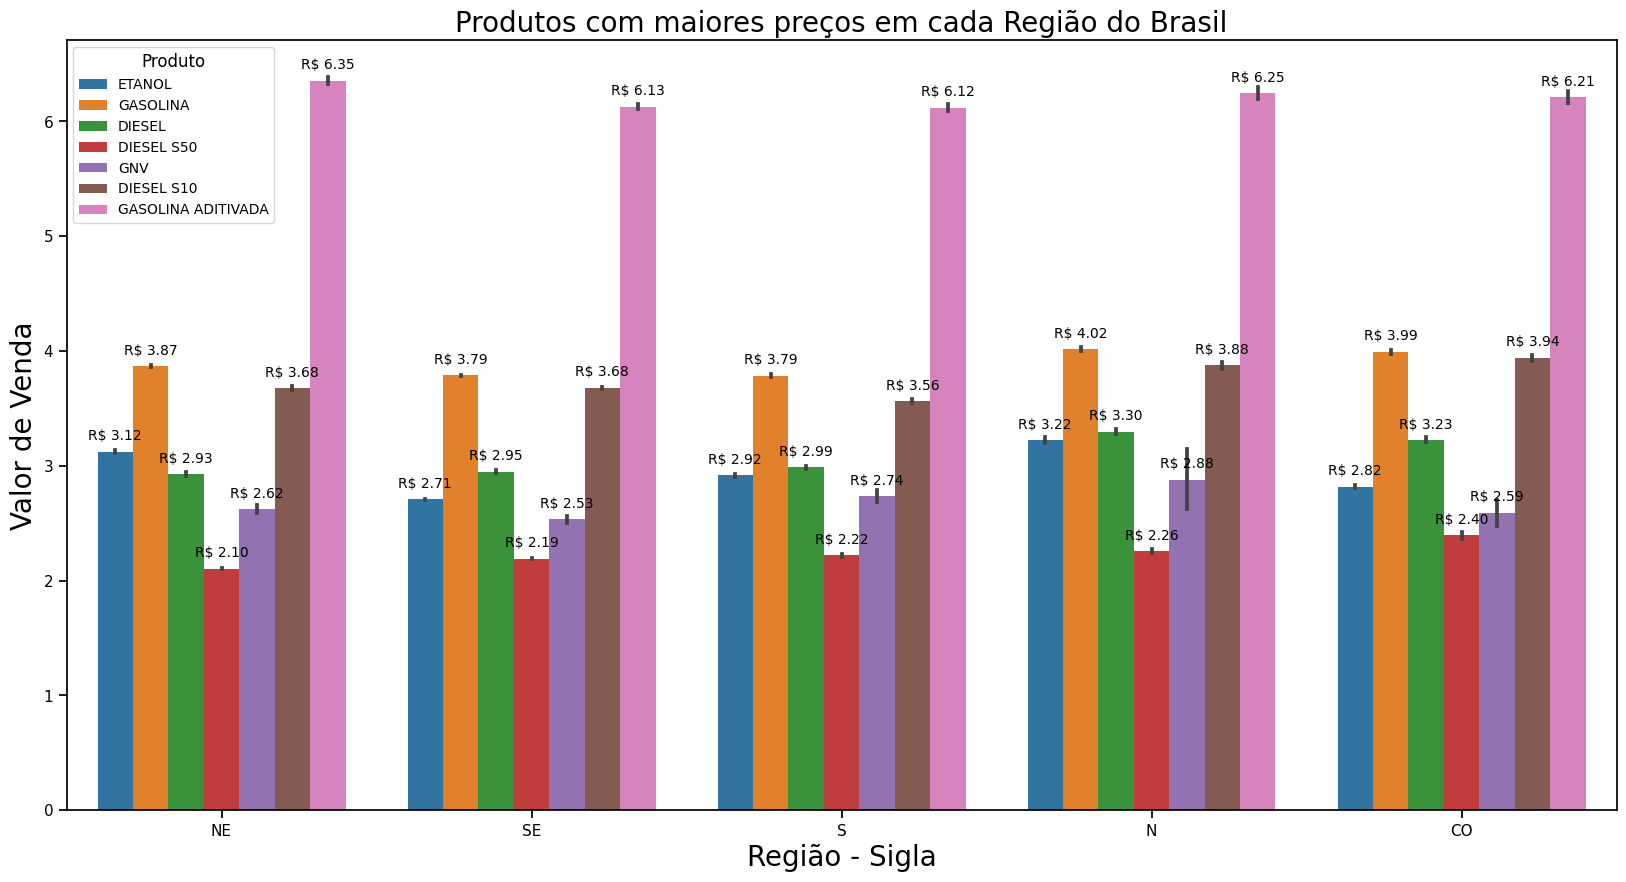

In [7]:
plt.figure(figsize=(20, 10))
sns.set_context("notebook", rc={"legend.fontsize": 10, "axes.titlesize": 20, "axes.labelsize": 20})

grafico2 = sns.barplot(data=amostra_df, x='Regiao - Sigla', y='Valor de Venda', hue='Produto')

plt.xlabel('Região - Sigla')
plt.ylabel('Valor de Venda')
plt.title('Produtos com maiores preços em cada Região do Brasil')

for p in grafico2.patches:
    valor = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, valor + 0.1, f'R$ {valor:.2f}', ha='center', fontsize=10)

plt.savefig("Graficos_salvos/Produtos-com-maiores-preços-em-cada-Região-do-Brasil.png")

plt.show()

Aqui podemos ter uma boa noção da distribuição dos valores por cada regição separado por cara combustivel

## 3. Analisando o valor de venda total

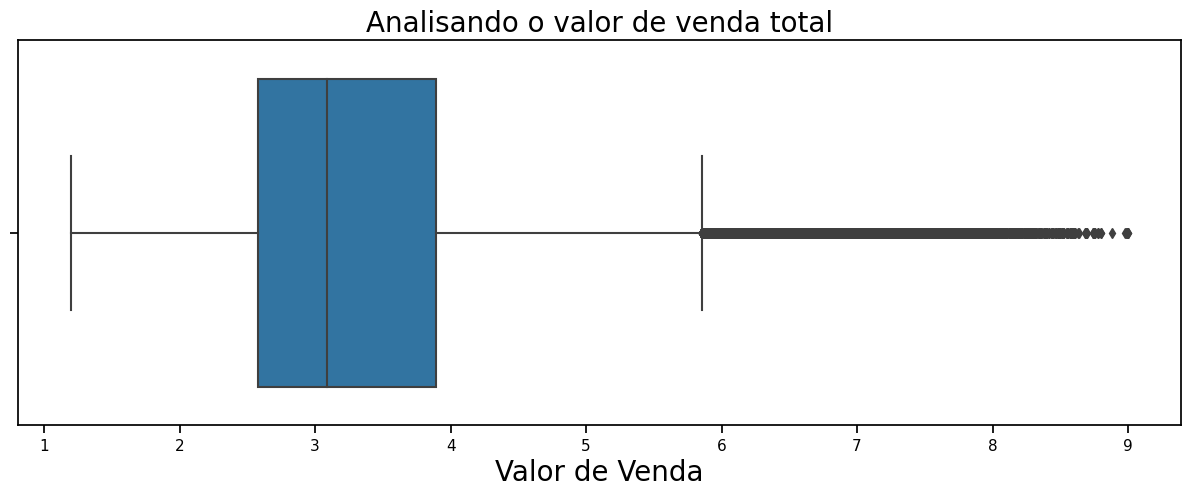

In [8]:
plt.figure(figsize=(15, 5))
grafico3 = sns.boxplot(data=amostra_df, x='Valor de Venda')

plt.xlabel('Valor de Venda')
plt.title('Analisando o valor de venda total')

plt.savefig("Graficos_salvos/Analisando-o-valor-de-venda-total.png")

plt.show()

Nesse Grafico vou precisar explicar o que está acontecendo
trata-se de um boxplot.
* A Caixa em azul significa os valores de vendas em um modo geral de 25% até 75% dos dados e a linha do meio  da caixa é onde está a mediana
* Entre a caixa e as pontas do começo e do fim temos uma representação da distancia que é dos primeiros 25% e dos ultimos 25% em relação a caixa
* Serve basicamente para indicar onde está consentrado os valores de vendas em modo geral
* E Por ultimo os outliers, que são os pontos pretos alem do que consederariamos normal (nesse caso em relação ao preço dos combustiveis vemos que eles tiveram muitos momentos de alta, ou seja muitos outliers)

## 4. Distribuição do Valor de Venda por Região

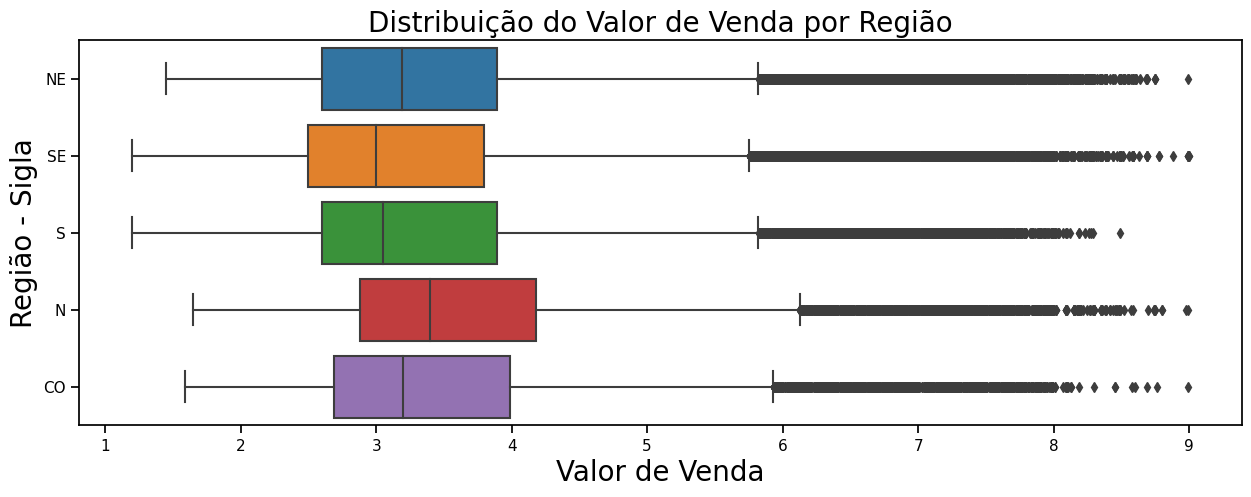

In [9]:
plt.figure(figsize=(15, 5))
grafico3 = sns.boxplot(data=amostra_df, x='Valor de Venda', y='Regiao - Sigla')

plt.ylabel('Região - Sigla')
plt.xlabel('Valor de Venda')
plt.title('Distribuição do Valor de Venda por Região')

plt.savefig("Graficos_salvos/Distribuição-do-Valor-de-Venda-por-Região.png")

plt.show()


Aqui temos o mesmo que foi explicado anteriormente, mais agora separado por cada região

Nos dados existem muitas bandeiras, precisamos filtrar isso.
Por isso vou descobrir as 5 principais bandeiras para poder analisa-las

In [16]:
somas_por_bandeira = amostra_df.groupby('Bandeira')['Valor de Venda'].sum().sort_values(ascending=False)
somas_por_bandeira.to_csv('Tabelas/somas_por_bandeira.csv')
somas_por_bandeira.head()

Bandeira
BRANCA                          616684.970
PETROBRAS DISTRIBUIDORA S.A.    375237.773
IPIRANGA                        331718.039
RAIZEN                          263245.938
VIBRA ENERGIA                   104621.180
Name: Valor de Venda, dtype: float64

## 5. Preço cobrado por cada Bandeira de cada Produto

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


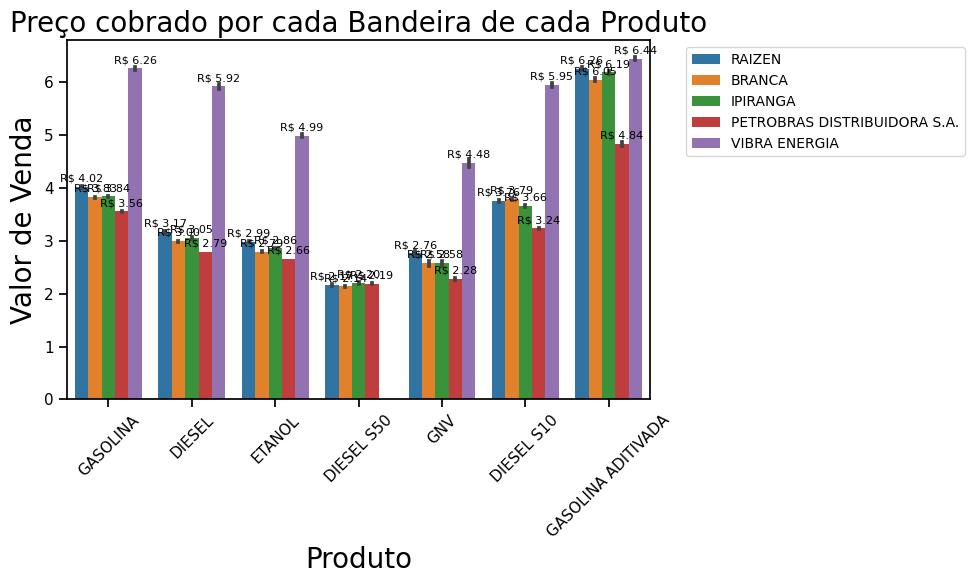

In [12]:
top_5_bandeiras = somas_por_bandeira.head(5).index

amostra_top_5 = amostra_df[amostra_df['Bandeira'].isin(top_5_bandeiras)]

plt.figure(figsize=(10, 6))
grafico4 = sns.barplot(data=amostra_top_5, x='Produto', y='Valor de Venda', hue='Bandeira')

plt.xlabel('Produto')
plt.ylabel('Valor de Venda')
plt.title('Preço cobrado por cada Bandeira de cada Produto')

for p in grafico4.patches:
    valor = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, valor + 0.1, f'R$ {valor:.2f}', ha='center', fontsize=8)


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)

plt.savefig("Graficos_salvos/Preço-cobrado-por-cada-Bandeira-de-cada-Produto.png")

plt.tight_layout()
plt.show()

Aqui podemos observar uma coisa bastante enteressante, O preço que a petrobraz cobra ou cobrou pela gasolina aditivada é menor, ou melhor, muito menor do que os valores vendidos por outras bandeiras ao longo dos 10 anos

Novamente vamos fazer uma analise por cada combustivel, mais agora separados pelas 5 maiores bandeiras.

## 6. Distribuição das Unidades de Medida

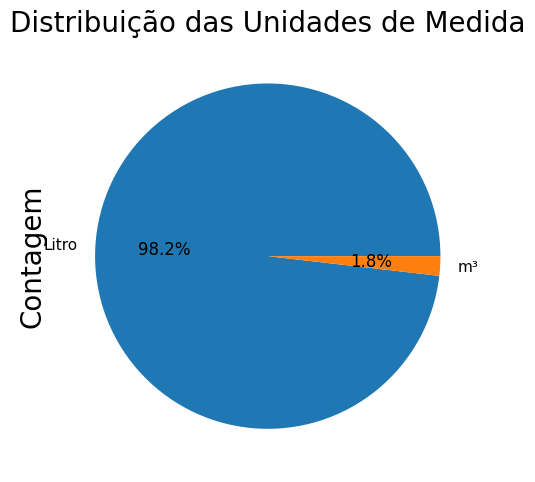

In [13]:
plt.figure(figsize=(5, 5))

grafico = amostra_df['Unidade de Medida'].value_counts().plot.pie(autopct='%1.1f%%')

plt.title('Distribuição das Unidades de Medida')
plt.ylabel('Contagem')

plt.savefig("Graficos_salvos/Distribuição-das-Unidades-de-Medida.png")

plt.tight_layout()
plt.show()

Nesse grafico podemos ver notoriamente que a grande maioria das unidades de medida ultilizadas é o litro com 98.2%
Esse numero pode variar dependendo do tamanho da amostra

## 7. Distribuição das Bandeiras de Combustível Específicas

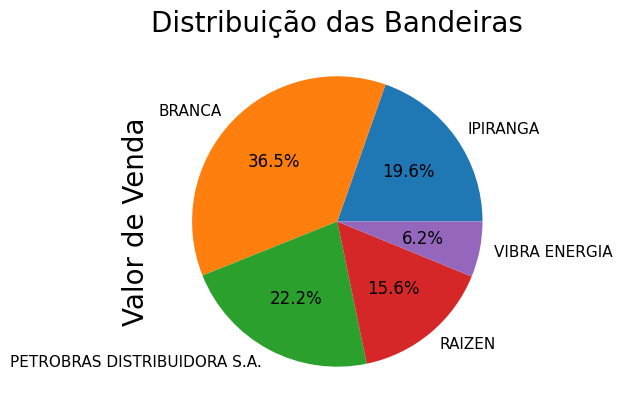

In [14]:
maiores_bandeiras = ["IPIRANGA", "BRANCA", "PETROBRAS DISTRIBUIDORA S.A.", "RAIZEN", "VIBRA ENERGIA"]

somas_bandeiras = somas_por_bandeira[maiores_bandeiras]

plt.figure(figsize=(6, 6))

grafico = somas_bandeiras.plot.pie(autopct='%1.1f%%')

plt.title('Distribuição das Bandeiras')

plt.tight_layout()

plt.savefig("Graficos_salvos/Distribuição-das-Bandeiras-de-Combustível-Específicas.png")

plt.show()

O gráfico apresentado ilustra a distribuição de mercado entre diferentes empresas no setor de combustíveis. Os dados destacam a participação de mercado de cada uma das principais empresas, revelando uma visão panorâmica das porções que elas ocupam.

Notavelmente, a Bandeira Branca emerge como o grupo com a maior fatia do mercado, representando 36,5% das vendas de combustíveis. A presença significativa da Bandeira Branca indica que uma parcela substancial das vendas é proveniente de postos de combustíveis privados.

A Petrobras, por sua vez, detém uma parcela de 22,2% do mercado. Sua posição como uma das principais empresas no setor ressalta sua influência no mercado de combustíveis.

Em seguida, a Ipiranga figura com 19,6% da fatia do mercado. A presença consistente da Ipiranga evidencia sua posição como concorrente relevante no cenário dos combustíveis.

A Raízen, com 15,6% de participação, é outra empresa notável, contribuindo de maneira significativa para a dinâmica competitiva do mercado.

Finalmente, a Vibra Energia detém 6,2% das vendas, representando uma parte menor do mercado, mas ainda assim demonstrando sua presença e impacto nas escolhas dos consumidores.

Esse gráfico oferece uma visão clara da distribuição das principais empresas no mercado de combustíveis, enriquecendo nossa compreensão das forças e dinâmicas que moldam a indústria.

Continual em 3_series_temporais.ipynb...